In [1]:
import librosa.display
import tensorflow as tf
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/features_3_sec.csv')

In [3]:
df.shape

(9990, 60)

In [4]:
df['tags'] = df['filename'].str.split('.').str[1]

In [5]:
df['tags1'] = df['filename'].str.split('.').str[0]

In [6]:
df['tags'].value_counts()

00000    100
00075    100
00073    100
00072    100
00071    100
        ... 
00038     99
00032     99
00031     99
00051     99
00049     99
Name: tags, Length: 100, dtype: int64

In [7]:
df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,tags,tags1
20,blues.00002.0.wav,66149,0.366614,0.090509,0.152206,0.002467,1676.978191,433761.847841,1794.856236,56792.982500,...,44.652466,-2.819872,50.686920,-2.062507,38.493343,-4.214690,23.373898,blues,00002,blues
21,blues.00002.1.wav,66149,0.384461,0.084645,0.167405,0.001362,1337.448514,69939.396509,1658.057449,50969.919105,...,65.734543,-0.409954,47.267921,-1.283557,51.049812,-0.642756,27.588282,blues,00002,blues
22,blues.00002.2.wav,66149,0.379043,0.086581,0.176237,0.001924,1590.857591,153760.844757,1779.645051,79475.879079,...,44.407555,-3.105310,40.462624,-4.471606,46.745087,-1.416849,35.118946,blues,00002,blues
23,blues.00002.3.wav,66149,0.397078,0.080919,0.177723,0.001808,1436.270424,98276.302728,1690.135527,55831.185712,...,49.576012,2.942567,28.540144,-0.360661,54.554077,-1.046457,27.857132,blues,00002,blues
24,blues.00002.4.wav,66149,0.360683,0.088624,0.183903,0.001507,1540.099772,145972.646462,1726.643189,65111.550643,...,34.864491,-2.013198,24.143799,-4.399901,32.495110,-3.156466,38.718266,blues,00002,blues
25,blues.00002.5.wav,66149,0.364035,0.088116,0.152364,0.001923,1594.920885,260781.775496,1730.746723,113020.010243,...,46.145531,-2.628009,53.689621,-2.401809,59.490814,-0.967632,32.147289,blues,00002,blues
26,blues.00002.6.wav,66149,0.299589,0.083030,0.170790,0.001917,1396.794527,81945.617374,1517.311972,92242.679953,...,41.892445,-6.356915,48.576363,-7.920033,24.511488,-0.412127,22.517632,blues,00002,blues
27,blues.00002.7.wav,66149,0.361508,0.079471,0.190943,0.003116,1549.572759,47057.458331,1788.919219,45072.259662,...,39.133656,0.860312,79.191307,-5.330613,42.226936,1.075333,22.927328,blues,00002,blues
28,blues.00002.8.wav,66149,0.334331,0.081312,0.196997,0.003942,1704.564643,75336.469181,1880.313683,46849.145321,...,58.522827,2.397915,65.363472,-6.671227,38.077599,-2.200269,30.644648,blues,00002,blues
29,blues.00002.9.wav,66149,0.391811,0.078529,0.187923,0.005516,1673.364389,68382.596855,1893.572151,47306.278227,...,24.065565,2.025056,20.160931,-6.556604,29.323061,-1.891574,35.834270,blues,00002,blues


In [8]:
save_for_analysis = df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]['chroma_stft_mean']

# Lets drop some unecessary features.

In [9]:
df.drop(['filename','tags'],axis =1 ,inplace = True)

In [10]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,tags1
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,blues


# Let's visualize the dataset and understand our data better.

There are 8 main genres with 1000 sub-classes per 
genre, such as Electronic, Experimental, Folk, Hip-hop, Instrumental, International, 
Pop, Rock. And most of them are with sampling rate of 44,100 Hz, bit rate 320 kb/s, 
and in stereo. The GTZAN dataset consists of 1000 audio tracks of 30 seconds long, 
which contains 10 genres with 100 tracks per genre. All tracks are 22,050Hz, Mono 
16-bit audio files in .wav format (Sturm, 2013).

In [11]:
# It returns 
# y : np.ndarray [shape=(n,) or (..., n)]
#    audio time series. Multi-channel is supported.
#sr : number > 0 [scalar]
#   sampling rate of ``y``

rec_file = 'Data/genres_original/blues/blues.00002.wav'
data,sr = librosa.load(rec_file)

In [12]:
librosa.load(rec_file,sr=44100) # Opening in sample rate of 44100

(array([ 0.01888484,  0.03553968,  0.04781976, ..., -0.12216461,
        -0.12027903, -0.06499076], dtype=float32),
 44100)

In [13]:
import IPython
IPython.display.Audio(data,rate = sr)

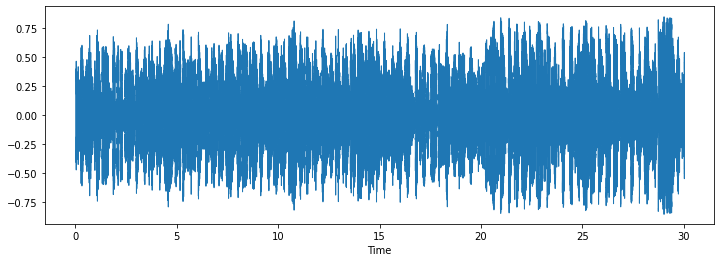

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,4))
librosa.display.waveshow(data)

# Lets Create A spectogram

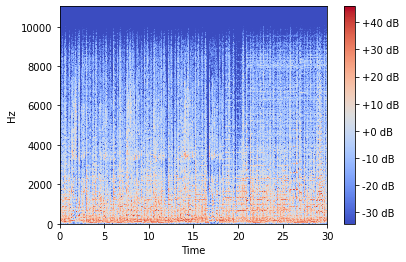

In [15]:
# By converting to decibels (dB) the scale becomes logarithmic. 
#This limits the numerical range, to something like 0-120 dB instead. 
#The intensity of colors when this is plotted corresponds more closely to what we hear than if one used a linear scale.
n_fft = 2048
hop_length = 512
stft = librosa.stft(data,n_fft=2048,hop_length = 512)
stft_db = librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(data = stft_db,sr = 22050, x_axis = 'time', y_axis = 'hz')
plt.colorbar(format="%+2.f dB")

The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip.

# Rolloff - fequency
Its a frequency below which a specified percentage of the total spectral lies / 85%


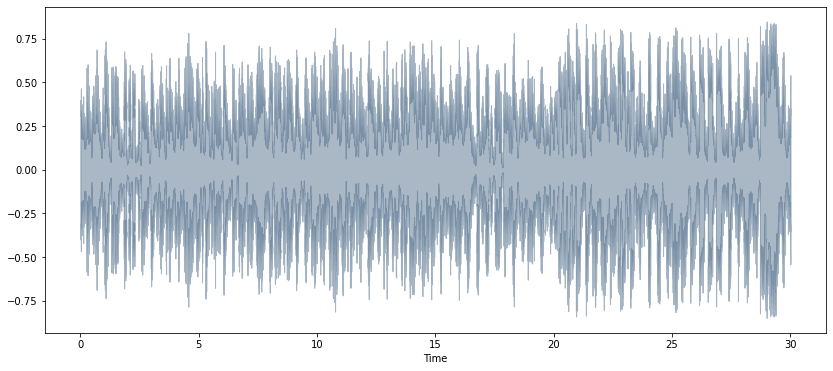

In [16]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color = "#2B4F72")

# Chroma Feature.
It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation. 

Text(0.5, 1.0, 'Chroma Features')

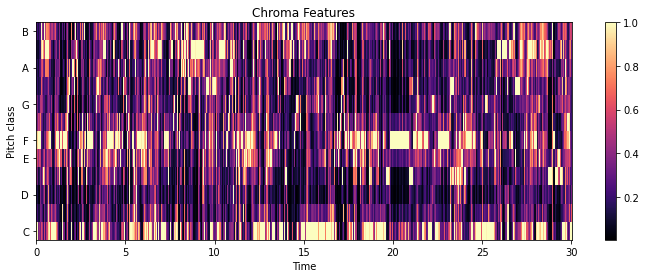

In [17]:
plt.figure(figsize = (12,4))
chroma = librosa.feature.chroma_stft(data,sr = 45600)
librosa.display.specshow(chroma,sr = sr, x_axis = 'time',y_axis = 'chroma')
plt.colorbar()
plt.title("Chroma Features")


In [18]:
chroma.mean()

0.37062144

# MFCC Extraction

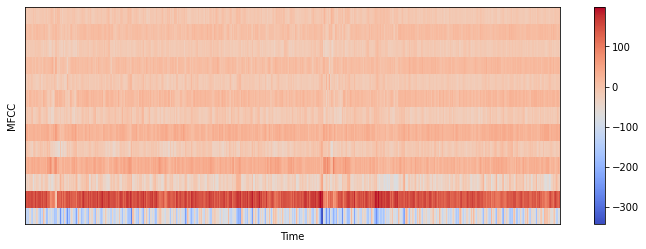

In [19]:
plt.figure(figsize = (12,4))
mfcc = librosa.feature.mfcc(data,n_fft =n_fft,hop_length = hop_length,n_mfcc=13)
librosa.display.specshow(mfcc,sr = sr,hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()

In [20]:
import os
path = 'Data\genres_original'
filenames_all = []
labels = []
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(path)):    
    if dirpath != path:
        filenames_all.append(filenames)
        labels.append(len(filenames_all[i-1])*[i-1])


In [21]:
len(labels)

10

In [24]:
i = 0
j = 0
filenames_all[i][j]

'blues.00000.wav'

In [27]:
import math
import librosa
import json
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)

            # process all audio files in genre sub-dir
            for f in filenames:

        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [28]:
save_mfcc(dataset_path = 'Data/genres_original',json_path = 'data.json')

In [21]:
import json
with open('data.json') as fp:
        data = json.load(fp)
        X = np.array(data['mfcc'])
        y = np.array(data['labels'])

In [30]:
set(y) # These are unique values
#0-> Blues
#1-> classical
#2-> country
#3-> disco
#4-> hiphop
#5-> jazz
#6-> metal
#7-> pop
#8-> reggae
#9-> rock

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [33]:

# splitting the data into Train and Test sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Building the CNN
from tensorflow import keras
model = keras.Sequential(
    [   # Input
        keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
        # Hidden 
        keras.layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        # Dropout to reduce overfitting.
        keras.layers.Dropout(0.3),
        # Hidden 
        keras.layers.Dense(256, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # Hidden 
        keras.layers.Dense(64, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # Ouput
        keras.layers.Dense(10,activation = "softmax")
    ]
)

In [34]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(X_train,y_train,
          validation_data = (X_test,y_test),
          epochs = 50,
          batch_size = 32)

Epoch 1/50
110/110 [==============================] - 2s 16ms/step - loss: 30.4868 - accuracy: 0.1800 - val_loss: 5.1733 - val_accuracy: 0.2610
Epoch 2/50
110/110 [==============================] - 2s 15ms/step - loss: 11.0348 - accuracy: 0.2026 - val_loss: 3.7018 - val_accuracy: 0.2690
Epoch 3/50
110/110 [==============================] - 2s 15ms/step - loss: 6.8902 - accuracy: 0.2031 - val_loss: 3.4862 - val_accuracy: 0.2790
Epoch 4/50
110/110 [==============================] - 2s 15ms/step - loss: 4.9311 - accuracy: 0.2014 - val_loss: 3.4968 - val_accuracy: 0.2650
Epoch 5/50
110/110 [==============================] - 2s 15ms/step - loss: 4.2077 - accuracy: 0.1814 - val_loss: 3.4277 - val_accuracy: 0.2804
Epoch 6/50
110/110 [==============================] - 2s 15ms/step - loss: 3.8465 - accuracy: 0.2052 - val_loss: 3.4423 - val_accuracy: 0.2363
Epoch 7/50
110/110 [==============================] - 2s 15ms/step - loss: 3.6967 - accuracy: 0.2335 - val_loss: 3.3784 - val_accuracy: 0.26

**ANN** was not giving a good accuracy so let's see if we can use **CNN** for our project. For a CNN we will use mfcc spectogram 2-d array as it will be required for cnn to train as cnn will be able to extract features better  we can extract features which look like images and shape them in a way in order to feed them into a CNN.

In [35]:
# Preparing the datasets.
def train_test_validate_split(validation_size):
    with open('data.json') as fp:
            data = json.load(fp)
            X = np.array(data['mfcc'])
            y = np.array(data['labels'])
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = validation_size)
    
    # For using CNN we will require a 3d Array 
    X_train = X_train[...,np.newaxis] # it will create a 4d array (number of samples, 259, 13, 1)
    X_validation = X_validation[...,np.newaxis]
    X_test = X_test[...,np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test
    
    

In [36]:
#CNN

# Creating a Train, Validation and Test Sets
X_train, X_validation, X_test, y_train, y_validation, y_test = train_test_validate_split(0.2)


In [37]:
X_train.shape

(2995, 259, 13, 1)

In [71]:
# Creating A Model CNN 
from tensorflow import keras
input_shape =  (X_train.shape[1], X_train.shape[2],1) # Adding input shape 
cnn_model = keras.Sequential()


In [72]:
# For early stopping of model
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5)


In [73]:
# 1st layer
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# 2nd layer
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# 3rd layer
cnn_model.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# flatten output and then use dense layer
cnn_model.add(keras.layers.Flatten())

cnn_model.add(keras.layers.Dense(128, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

cnn_model.add(keras.layers.Dense(32, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

# output layer
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

# Optimizers
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
cnn_model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ["accuracy"])

In [74]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 257, 11, 64)       640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 129, 6, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 129, 6, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 127, 4, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 2, 64)        0         
 2D)                                                             
                                                      

Finally after all this lest fit and check if we can get some good accuracy after all our hardowrk done.

In [75]:
cnn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=60,callbacks = [callback])

Epoch 1/60
94/94 [==============================] - 7s 71ms/step - loss: 2.4812 - accuracy: 0.1790 - val_loss: 2.1070 - val_accuracy: 0.3084
Epoch 2/60
94/94 [==============================] - 7s 70ms/step - loss: 2.1765 - accuracy: 0.2484 - val_loss: 1.9170 - val_accuracy: 0.3939
Epoch 3/60
94/94 [==============================] - 7s 70ms/step - loss: 2.0191 - accuracy: 0.2938 - val_loss: 1.7311 - val_accuracy: 0.4513
Epoch 4/60
94/94 [==============================] - 7s 70ms/step - loss: 1.8907 - accuracy: 0.3369 - val_loss: 1.6601 - val_accuracy: 0.4740
Epoch 5/60
94/94 [==============================] - 7s 70ms/step - loss: 1.8287 - accuracy: 0.3689 - val_loss: 1.5544 - val_accuracy: 0.4806
Epoch 6/60
94/94 [==============================] - 6s 69ms/step - loss: 1.7269 - accuracy: 0.4057 - val_loss: 1.5156 - val_accuracy: 0.4820
Epoch 7/60
94/94 [==============================] - 7s 70ms/step - loss: 1.6895 - accuracy: 0.4184 - val_loss: 1.4318 - val_accuracy: 0.5260
Epoch 8/60
94

In [76]:
test_error, test_accuracy = cnn_model.evaluate(X_test,y_test)
print(f'We are getting test accuracy as: {test_accuracy}')

40/40 [==============================] - 1s 16ms/step - loss: 0.8895 - accuracy: 0.7326
We are getting test accuracy as: 0.7325860857963562


In [77]:
X_predict = X_test[10]
y_predict = y_test[10]

In [78]:
X_predict.shape

(259, 13, 1)

In [79]:
# Our model take (259,13,1,1) shape so we need to add one more axis 
X_predict = X_predict[np.newaxis, ...]

In [80]:
prediction = cnn_model.predict(X_predict)

1/1 [==============================] - 0s 53ms/step


In [81]:
predicted_index = np.argmax(prediction, axis=1)

In [82]:
# Lets see if our model is predicting properly or not 
print(predicted_index,y_predict)

[2] 2


***And the answer is yes it's predicting properly*** Now lets start working on deploying this whole model.

# What else we could have done ? 
1. Right now we are only using mfcc we can also use chroma values 
2. We can also use other params like rollof frequency for our dataset creation but and with that our data would become big and would give our model more information

Lets now go ahead and save our model and create a function to extract mfcc features from new audio file.

In [83]:
# Saving the  model
cnn_model.save('music-gen-classify-v1/')

INFO:tensorflow:Assets written to: music-gen-classify-v1/assets


INFO:tensorflow:Assets written to: music-gen-classify-v1/assets


In [35]:
from tensorflow import keras
new_model = keras.models.load_model('music-gen-classify-v1/')

In [50]:
X_predict.shape

NameError: name 'X_predict' is not defined

In [87]:
pred = new_model.predict(X_predict)
np.argmax(pred,axis = 1)

1/1 [==============================] - 0s 13ms/step


array([2], dtype=int64)

In [56]:
import librosa

def get_mfcc(dataset_path,audio_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    new_data = {
        "mfcc": []
    }

    SAMPLE_RATE = 22050
    audio,sample_rate = librosa.load(audio_path,sr = SAMPLE_RATE)
    TRACK_DURATION = int(librosa.get_duration(audio)) # measured in seconds
    SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        new_data["mfcc"].append(mfcc.tolist())

    return new_data

In [53]:
res = get_mfcc(dataset_path = 'Data/upload/',audio_path = 'Data/upload/user/country.00042.wav')

In [54]:
ans = np.array(res['mfcc'])
ans = ans[...,np.newaxis]

In [55]:
ans.shape

(5, 259, 13, 1)

In [39]:
result = new_model.predict(ans)
max(np.argmax(result,axis = 1))

1/1 [==============================] - 0s 187ms/step


2

So we are getting good accuracy and let's start building our application using Streamlit.